<a href="https://colab.research.google.com/github/Monipoo0904/iCouldHaveDied/blob/main/MReed_DeepLearning_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
<td vertical-align="bottom">
<a target="_blank" align="center" href="https://stepup.ai/train_data_augmentation_keras"><img height="32px" src="https://stepup.ai/favicon.png"/>Follow on stepup.ai</a>
</td>
<td>
 <a  target="_blank" href="https://colab.research.google.com/github/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/train_data_augmentation_keras.ipynb"><img style="margin-bottom:10px" src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>
<td>
<a target="_blank" href="https://github.com/dufourpascal/stepupai/blob/master/tutorials/data_augmentation/train_data_augmentation_keras.ipynb"><img style="margin-bottom:10px" class="invertable-logo" src="https://www.tensorflow.org/images/GitHub-Mark-32px.png"/>View source on GitHub</a>
</td>
<td>
<a href="https://drive.google.com/file/d/1-PBQVVUWhyQ_ctZFqMH02XihvmHOCjIe/view?usp=sharing" download><img class="invertable-logo" style="margin-bottom:10px" src="https://www.tensorflow.org/images/download_logo_32px.png"/>Download notebook</a>
</td>
</table>

# Training with Data Augmentation in Keras
In this tutorial, we are going to train a Cifar10 classifier from scratch and see how much benefit data augmentation can bring.
Follow along on the [blog post](https://stepup.ai/train_data_augmentation_keras) for descriptions and a detailed discussion!

# Setup

## Imports and Helper Functions
First we define the imports for tensorflow, keras and matplotlib.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

And we're going to define a helper function to plot the first few images in a dataset.

In [2]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

## Load and Cifar10 Dataset
Now let's import the Cifar10 dataset and plot a few images along with their classes.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


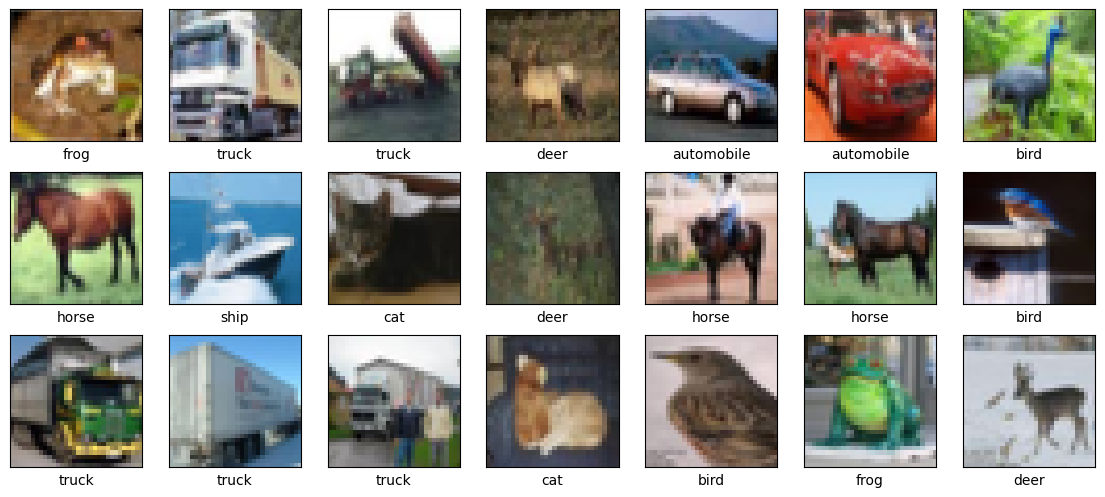

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes)

x_test = x_test / 255.0
y_test = to_categorical(y_test, num_classes)

visualize_data(x_train, y_train, class_names)

# Classifier Training

## Define the Model
We are going to create a function that creates a VGG style convolutional neural network classifier.

In [4]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))

    #model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

   # model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    #model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

## Train without Data Augmentation
First we define the basic parameters for model training, such as batch size and number of epochs.
Then we instantiate the model and show the summary. Finally we train it with the unaugmented Cifar10 dataset.

In [5]:
batch_size = 15
epochs = 15
m_no_aug = create_model()
m_no_aug.summary()

history_no_aug = m_no_aug.fit(
    x_train, y_train,
    epochs=epochs, batch_size=batch_size,
    validation_data=(x_test, y_test))

loss_no_aug, acc_no_aug = m_no_aug.evaluate(x_test,  y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.4346 - loss: 1.5557 - val_accuracy: 0.6659 - val_loss: 0.9407
Epoch 2/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.6995 - loss: 0.8520 - val_accuracy: 0.7233 - val_loss: 0.7982
Epoch 3/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7628 - loss: 0.6769 - val_accuracy: 0.7285 - val_loss: 0.7857
Epoch 4/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7918 - loss: 0.5891 - val_accuracy: 0.7494 - val_loss: 0.7382
Epoch 5/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8225 - loss: 0.5047 - val_accuracy: 0.7442 - val_loss: 0.7891
Epoch 6/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8473 - loss: 0.4302 - val_accuracy: 0.7321 - val_loss: 0.8458
Epoch 7/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8666 - loss: 0.3724 - val_accuracy: 0.7413 - val_loss: 0.8330
Epoch 8/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8865 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


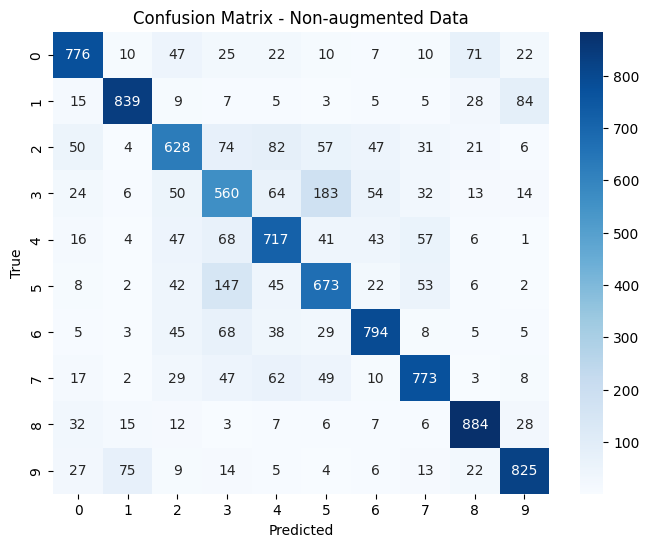

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.87      0.84      0.86      1000
           2       0.68      0.63      0.65      1000
           3       0.55      0.56      0.56      1000
           4       0.68      0.72      0.70      1000
           5       0.64      0.67      0.65      1000
           6       0.80      0.79      0.80      1000
           7       0.78      0.77      0.78      1000
           8       0.83      0.88      0.86      1000
           9       0.83      0.82      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Test accuracy: 0.7469


In [6]:

#Apply the same for non-augmented data


# Step 1: Generate predictions
y_pred = np.argmax(m_no_aug.predict(x_test), axis=1)  # Get class predictions (for multiclass)

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix - Non-augmented Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 4: Print classification report (includes precision, recall, and f1-score)
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# You can also print the accuracy here if needed
print(f"Test accuracy: {acc_no_aug:.4f}")

## Define Data Augmentation
Now it's time to set up our data augmentation pipeline.
First we define the augmentation parameters and then we instantiate the data generator.
We also plot a few augmented images to make sure that everything is ok

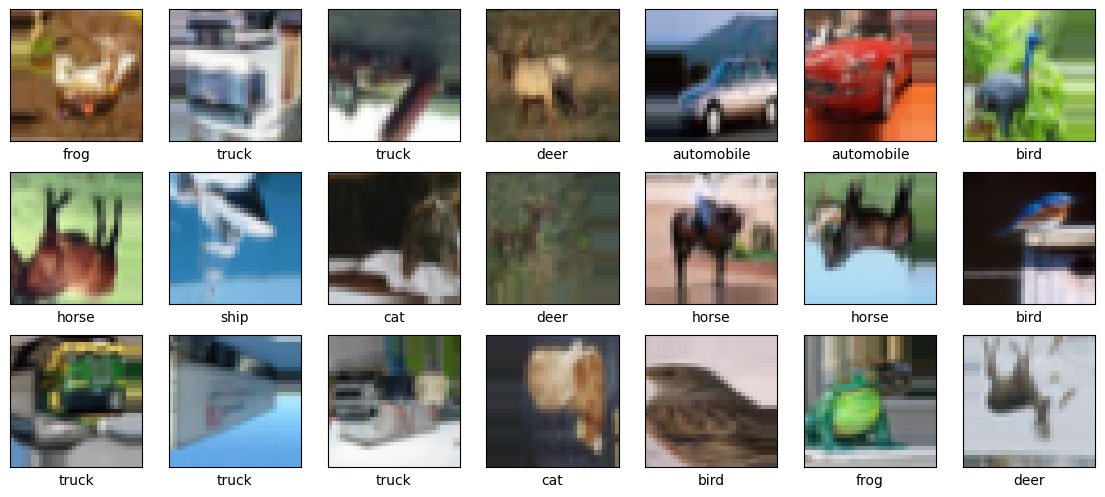

In [7]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.2,
    fill_mode='nearest',
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0.2
    )
datagen.fit(x_train)

it = datagen.flow(x_train, y_train, shuffle=False)
batch_images, batch_labels = next(it)
visualize_data(batch_images, batch_labels, class_names)

## Train with Data Augmentation
Let's perform the training again, this time with data augmentation!

In [8]:
m_aug = create_model()
datagen.fit(x_train)

history_aug = m_aug.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test))
loss_aug, acc_aug = m_aug.evaluate(x_test,  y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3334/3334 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.3036 - loss: 1.8654 - val_accuracy: 0.4833 - val_loss: 1.4216
Epoch 2/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.5053 - loss: 1.3822 - val_accuracy: 0.5782 - val_loss: 1.1772
Epoch 3/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.5535 - loss: 1.2477 - val_accuracy: 0.5922 - val_loss: 1.1594
Epoch 4/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.5877 - loss: 1.1591 - val_accuracy: 0.6198 - val_loss: 1.0636
Epoch 5/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.6080 - loss: 1.1124 - val_accuracy: 0.6438 - val_loss: 1.0141
Epoch 6/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.6196 - loss: 1.0632 - val_accuracy: 0.6531 - val_loss: 0.9878
Epoch 7/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.6302 - loss: 1.0339 - val_accuracy: 0.6537 - val_loss: 0.9809
Epoch 8/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.6442 - loss: 1.00

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


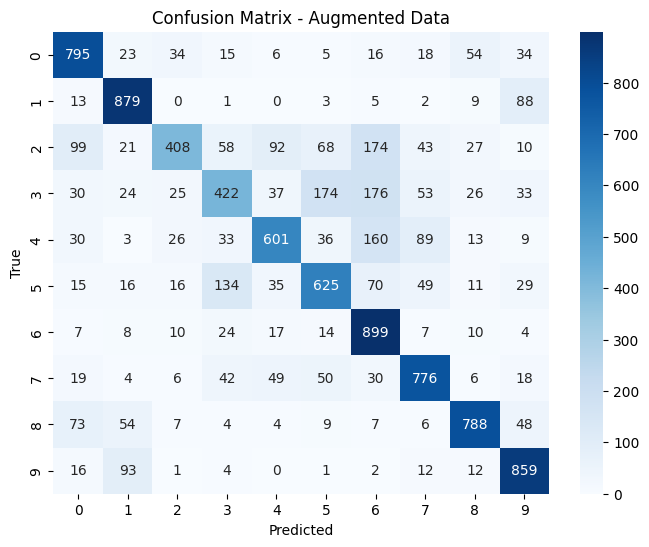

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.78      0.88      0.83      1000
           2       0.77      0.41      0.53      1000
           3       0.57      0.42      0.49      1000
           4       0.71      0.60      0.65      1000
           5       0.63      0.62      0.63      1000
           6       0.58      0.90      0.71      1000
           7       0.74      0.78      0.76      1000
           8       0.82      0.79      0.81      1000
           9       0.76      0.86      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

Test accuracy: 0.7052


In [9]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Generate predictions
y_pred = np.argmax(m_aug.predict(x_test), axis=1)  # Get class predictions (for multiclass)

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix - Augmented Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 4: Print classification report (includes precision, recall, and f1-score)
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# You can also print the accuracy here if needed
print(f"Test accuracy: {acc_aug:.4f}")


# Results
Let's compare the two runs in a single graph:

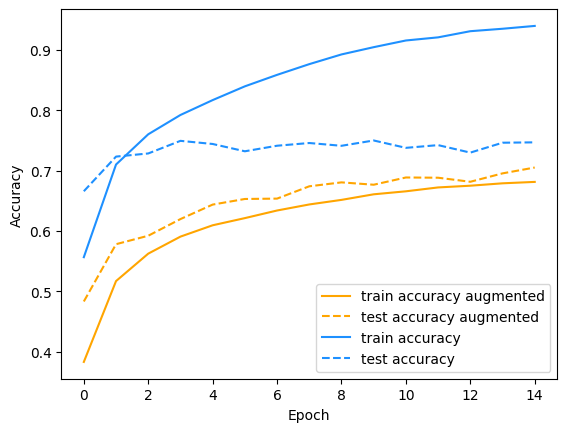

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

And lets also have a look at the loss curves:

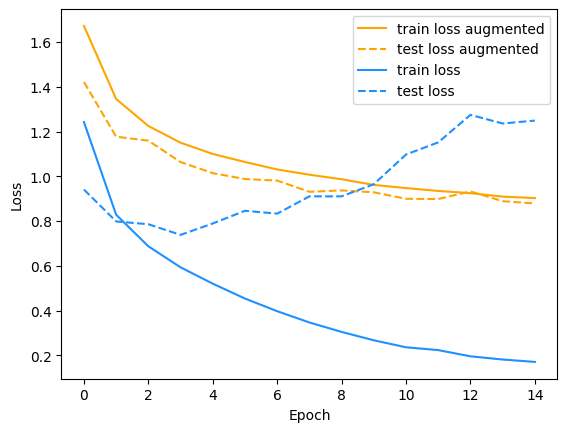

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(history_aug.history['loss'],
         label='train loss augmented',
         c='orange', ls='-')
plt.plot(history_aug.history['val_loss'],
         label='test loss augmented',
         c='orange',ls='--')

plt.plot(history_no_aug.history['loss'],
         label='train loss',
         c='dodgerblue', ls='-')
plt.plot(history_no_aug.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Head over to the [blog post](https://stepup.ai/train_data_augmentation_keras) for a detailed discussion!